Video duration: 42.96 seconds, Frame rate: 25.00 FPS


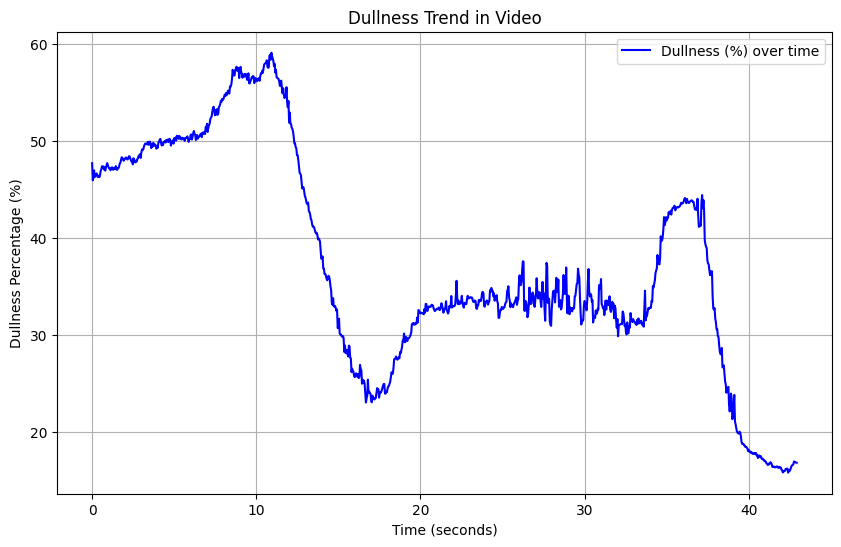

Dull Threshold (High Dullness): 49.68%
Bright Threshold (Low Dullness): 29.65%
Transition Duration: 38.16 seconds
Percentage of Video in Transition: 88.83%


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def analyze_video_dullness(video_path):
    # Initialize variables to store dullness percentage and timestamps
    dull_percentages = []
    frame_timestamps = []

    # Define thresholds for dull pixels
    dull_saturation_threshold = 80
    dull_value_threshold = 100

    # Open the video
    video = cv2.VideoCapture(video_path)
    if not video.isOpened():
        print("Error: Could not open video.")
        return

    # Get video properties
    frame_rate = video.get(cv2.CAP_PROP_FPS)
    frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count / frame_rate
    print(f"Video duration: {duration:.2f} seconds, Frame rate: {frame_rate:.2f} FPS")

    # Process each frame
    success, frame = video.read()
    while success:
        # Convert the frame to HSV
        frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Get the saturation and value channels
        saturation = frame_hsv[:, :, 1]
        value = frame_hsv[:, :, 2]

        # Calculate the percentage of dull pixels
        dull_mask = (saturation < dull_saturation_threshold) & (value < dull_value_threshold)
        dull_percentage = np.sum(dull_mask) / saturation.size * 100
        dull_percentages.append(dull_percentage)

        # Save the timestamp
        frame_timestamps.append(video.get(cv2.CAP_PROP_POS_MSEC) / 1000)  # Timestamp in seconds

        # Read the next frame
        success, frame = video.read()

    # Release the video
    video.release()

    # Plot dullness trend over time
    plt.figure(figsize=(10, 6))
    plt.plot(frame_timestamps, dull_percentages, label="Dullness (%) over time", color="blue")
    plt.title("Dullness Trend in Video")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Dullness Percentage (%)")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Calculate thresholds for dull and bright periods
    dull_threshold = np.percentile(dull_percentages, 80)  # 80th percentile (mostly dull)
    bright_threshold = np.percentile(dull_percentages, 20)  # 20th percentile (mostly bright)

    # Find transition frames
    transition_indices = [
        i for i, dull in enumerate(dull_percentages) if bright_threshold <= dull <= dull_threshold
    ]

    # Calculate transition duration
    if transition_indices:
        transition_start_time = frame_timestamps[transition_indices[0]]
        transition_end_time = frame_timestamps[transition_indices[-1]]
        transition_duration = transition_end_time - transition_start_time
        transition_percentage = (transition_duration / duration) * 100
    else:
        transition_duration = 0
        transition_percentage = 0

    # Print results
    print(f"Dull Threshold (High Dullness): {dull_threshold:.2f}%")
    print(f"Bright Threshold (Low Dullness): {bright_threshold:.2f}%")
    print(f"Transition Duration: {transition_duration:.2f} seconds")
    print(f"Percentage of Video in Transition: {transition_percentage:.2f}%")

# Analyze the video
video_path = 'Video.mp4'  # Replace with your video file path
analyze_video_dullness(video_path)
